# 3 Step Process to Analyzing Your Data (General case)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1: Define your goal. What's the impact? Who benefits? Why does this matter? 
- Take *lots* of written or typed notes here. 
- What, exactly, are you seeking to understand?
- Define your target variable. Does one exist in your dataset?
- Define your initial hypotheses: literally write them down
    - Are the stakeholders hoping to confirm or deny something already? That's a good start.
    - What initial hunches do you have? How could you confirm or deny them?
    - Are there industry based hunches you can confirm or deny?
    - If you have data from your industry, how does your dataset compare?
    - Based on the columns you have, do you see anything you *know* you need to look at?
- Define your Minimum Viable Product (MVP)
    - How do you know when you're done?
    - How do you know when you've got something to deliver?
    - If something seems interesting but out of scope, add it to your backlog and get back to the heart of the matter

### How to Generate Initial Hypotheses  

Think and write down your thoughts

![](hypothesis_generation.png)

### Defining Your Minimum Viable Product (MVP)

The real MVP is producing insight and takeaways stakeholders can use to improve their decision making

What would a Minimum Viable Product look like? You likely won't have 6 months to produce answers.

![](mvp.png)

## Step 2: Get to know your data at a high level
- *Dump out all your legos and take inventory of what you have*
- Take lots of written or typed notes as you move through these steps)
- Hunt down a data dictionary that explains what each column of your data is or represents.
    - This may mean talking to people
    - This may mean having coffee w/ someone from accounting to pick their brain
- Determine if there's any columns needing cleaning or a change in data type
- Hunt for any nulls or missing data. Write down how you handle them. There's no one right answer.
- What's the distribution of your target variable? What about your most interesting variables?

![](storytelling.webp)

## Step 3: Answer your initial hypotheses with visuals and statistics
- Always write down your takeaways as you learn or reveal them
- Use visuals, descriptive stats, and inferential stats to answer your hypotheses
- Start with one hypothesis at a time.
- Visualize and get stats on the population
- Start making subgroups to compare subgroups to the population and subgroups to subgroups
- Focus on getting the biggest bang for your buck rather than counting toenails on an ant.

![](descriptive-and-inferential-statistics.jpeg)

### Explore Relationships Between Variables and the Target Variable
![](hypothesis.jpeg)

# 3 Step Process to Data Analysis (Specific case with HR Attrition Data)
1. Define your goal, why this matters, your target variable, initial hypotheses (write these down)
2. Get to know your data: obtain a 10,000 ft view of your data before diving in (write down what you learn/discover)
3. Answer your initial hypotheses questions with visuals and statistics (write down takeaways as you go)

## Step 1: Define Goal, why it matters, id target variable, state initial hypotheses
- Manager: why are employees churning?
- DS question: What are the drivers of employee attrition?
    - Why does attrition matter? 
    - High cost of employee acquisition and training (50-200%)
    - Productivity: drop in overall productivity (less personnel, drop in morale for remaining employees)
    - Snowball effect in attrition
    - HR retention bonus for low attrition?
- Target variable:
    - attrition
- What are some interesting variables?
    - churned employee department
    - job satisfaction >> culture?
    - relationship (boss) satisfaction >> culture?
    - age/gender/race >> culture issue?
    - time since last promotion/raise
    - income, then...
    - department, by income
- What would a minimally viable product look like?
    - deliverable: can be:
        - email with recs >> the simplest 
        - sldieshow
        - ML model we deliver to engineering team to deploy live
    - what target rate are we hitting with churn?
    - whats th biggest story i.e. variable most correlated with churn?
    - we have survey data about job satisfaction and balance >> should we believe surverys?
        - are the neg surveys accurately correlated with churn?
        
     ** Source your data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Step 2: Get to know your Data at a high level
- Histograms and value counts of our target variable, and variables of interest
- Determine if we have any missing values
    - ** general guideline:
    - if you're doing any ML, split the data before exploring
    - if youre looking at how x and y move together, we need to operate on the `train` dataset
- check your datasource for a Data Dictionary
- check the value counts or a histogram of your target variable
- check for nulls and handle them
- "What do we know about the people who left?"

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("attrition.csv")

In [3]:
df.head(4).T
#pritn out the first few records. transposed so that info is vertical, no horizontal scrolling

,0,1,2,3
Age,41,49,37,33
Attrition,Yes,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently
DailyRate,1102,279,1373,1392
Department,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3
Education,2,1,2,4
EducationField,Life Sciences,Life Sciences,Other,Life Sciences
EmployeeCount,1,1,1,1
EmployeeNumber,1,2,4,5


<AxesSubplot:>

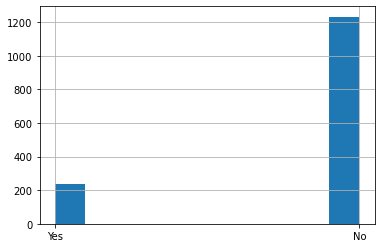

In [5]:
# target variable is attrition
# value counts and histograms
df.Attrition.hist()

In [6]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
# Ok what's our company's attrition v industry standard?
# Our company: 16%
# Industry standard (google): 10%
# we are 60% higher than industry standard


df[df.Attrition == 'Yes'].shape[0]/df.shape[0]

0.16122448979591836

In [9]:
# check for nulls
df.info()
# no null sto worry about yet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# Quantify the cost of lost employees:
# retraining cost * number of lost employees
# cost = 6-9 months salary = 0.5-0.75% of salary
# assume 60% of employees
monthly_income_att = df[df.Attrition == 'Yes'].MonthlyIncome.sum()
monthly_income_att

1134541

In [17]:
yearly_income_att = monthly_income_att * 12
yearly_income_att

13614492

In [18]:
# this is the cost of the problem
retrain_cost = yearly_income_att * .6
retrain_cost

8168695.199999999

In [22]:
(df.Attrition == 'Yes').sum()

237

## Takeaways
- 60% higher churn rate above industry
- retrain/replace costs may cost $8.2 mn for the 237 employees we need to hire

## Step 3: Answer initial hypotheses with visuals and stats (write takeaways as we go)
- use desc stats, visuals, hypothesis tests
- visualize satisfaction v attrition
- visualize income to attrition
- sometimes a few stats tell the story, other times we need a handful


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

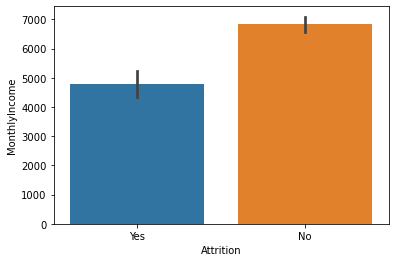

In [23]:
sns.barplot(x = "Attrition", y = "MonthlyIncome", data = df) #averages

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

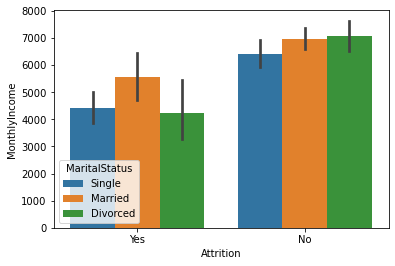

In [37]:
sns.barplot(x = "Attrition", y = "MonthlyIncome", hue = "MaritalStatus", data = df) #averages

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

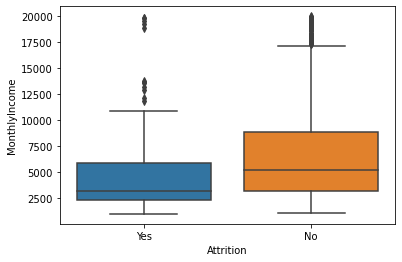

In [24]:
sns.boxplot(x = "Attrition", y = "MonthlyIncome", data = df) #distribution

## Takeaways so far:
- avg and median incomes for leavers are lower than for those who stay
- leavers ('lost'): larger proportion were single
- keepers ('kept'): larger proportion were married

In [ ]:
# Build the variables using pandas
churn = telco_data[df.Attrition == 'Yes']
kept = df[df.Attrition == 'No']

<AxesSubplot:>

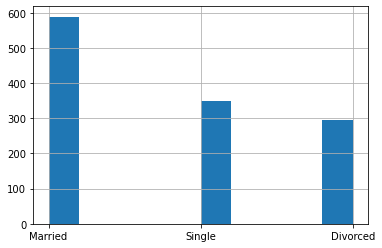

In [25]:
kept.MaritalStatus.hist()

<AxesSubplot:>

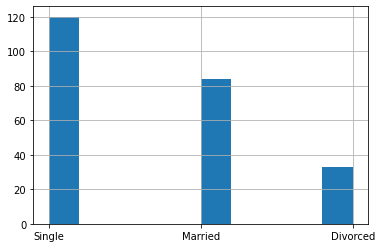

In [27]:
lost.MaritalStatus.hist()

In [30]:
lost.Gender.value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

In [31]:
kept.Gender.value_counts()

Male      732
Female    501
Name: Gender, dtype: int64

In [32]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

## Boxplots and histograms work well for these initial explorations

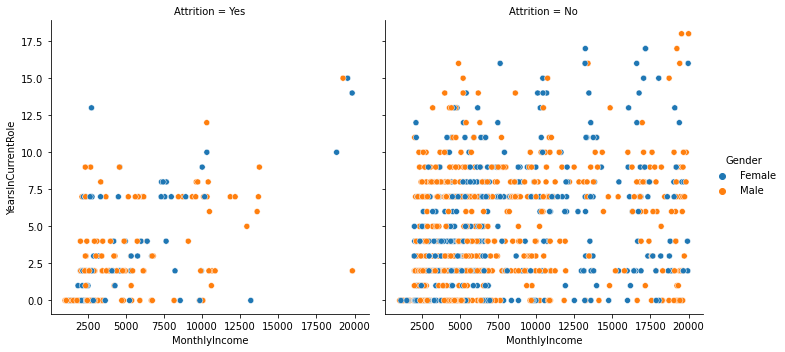

In [36]:
## boxplot shows distribution and spread
#Barplots show averages
#We can graph other things too, that pique our interest
sns.relplot(x="MonthlyIncome", y="YearsInCurrentRole", col="Attrition", data=df, hue="Gender")